# LeetCode

146. LRU Cache

https://leetcode.com/problems/lru-cache/

**Description**

    Design a data structure that follows the constraints of a Least Recently Used (LRU) cache.

    Implement the LRUCache class:

    LRUCache(int capacity) Initialize the LRU cache with positive size capacity.
    int get(int key) Return the value of the key if the key exists, otherwise return -1.
    void put(int key, int value) Update the value of the key if the key exists. Otherwise, add the key-value pair to the cache. If the number of keys exceeds the capacity from this operation, evict the least recently used key.
    The functions get and put must each run in O(1) average time complexity.

 
**Examples**

    Example 1:

    Input
    ["LRUCache", "put", "put", "get", "put", "get", "put", "get", "get", "get"]
    [[2], [1, 1], [2, 2], [1], [3, 3], [2], [4, 4], [1], [3], [4]]
    Output
    [null, null, null, 1, null, -1, null, -1, 3, 4]

    Explanation
    LRUCache lRUCache = new LRUCache(2);
    lRUCache.put(1, 1); // cache is {1=1}
    lRUCache.put(2, 2); // cache is {1=1, 2=2}
    lRUCache.get(1);    // return 1
    lRUCache.put(3, 3); // LRU key was 2, evicts key 2, cache is {1=1, 3=3}
    lRUCache.get(2);    // returns -1 (not found)
    lRUCache.put(4, 4); // LRU key was 1, evicts key 1, cache is {4=4, 3=3}
    lRUCache.get(1);    // return -1 (not found)
    lRUCache.get(3);    // return 3
    lRUCache.get(4);    // return 4
 

**Constraints**

    1 <= capacity <= 3000
    0 <= key <= 10^4
    0 <= value <= 10^5
    At most 2 * 10^5 calls will be made to get and put.

In [5]:
class Node:
    def __init__(self, key, val):
        self.key, self.val = key, val
        self.prev = self.next = None

class LRUCache:

    def __init__(self, capacity: int):
        self.cap = capacity
        self.cache = {}
        
        self.left, self.right = Node(0,0), Node(0,0)
        self.left.next, self.right.prev = self.right, self.left

    def remove(self, node):
        prev, nxt = node.prev, node.next
        prev.next, nxt.prev = nxt, prev
        

    def insert(self, node):
        prev, nxt = self.right.prev, self.right
        prev.next = nxt.prev = node
        node.next, node.prev = nxt, prev

    def get(self, key: int) -> int:
        if key in self.cache:
            self.remove(self.cache[key])
            self.insert(self.cache[key])
            return self.cache[key].val
        return -1

    def put(self, key: int, value: int) -> None:
        if key in self.cache:
            self.remove(self.cache[key])
        self.cache[key] = Node(key, value)
        self.insert(self.cache[key])

        if len(self.cache) > self.cap:
            lru = self.left.next
            self.remove(lru)
            del self.cache[lru.key]

In [12]:
obj = LRUCache(2)
obj.put(1,1)
print(obj.cache)
obj.put(2,2)
print(obj.cache)

{1: <__main__.Node object at 0x000002932ACA0A00>}
{1: <__main__.Node object at 0x000002932ACA0A00>, 2: <__main__.Node object at 0x000002932ABFDD60>}


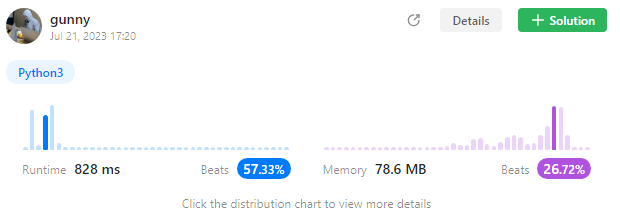